## Análise Exploratória da Evasão (EDA)

### Objetivo:
Explorar os dados tratados e enriquecidos para identificar padrões relacionados à evasão dos alunos.  
As análises buscam entender quais fatores mais se relacionam com o abandono — renda, distância, frequência e desempenho.

---

## Conclusões Esperadas:
- Entender a proporção geral de evasão.
- Identificar fatores de maior impacto (distância, renda, desempenho).
- Observar padrões visuais e correlações entre variáveis-chave.


---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

path = "../data/tmp/enriched.parquet"

df = pd.read_parquet(path)

# Mostra as primeiras linhas
display(df.head(5))
print(f"Total de alunos: {len(df)}")

---

### 1️⃣ Taxa Geral de Evasão
- Calcula a proporção total de alunos evadidos vs. não evadidos.
- Gera gráfico de pizza mostrando o percentual de evasão.

📉 Taxa de evasão total: 21.0%


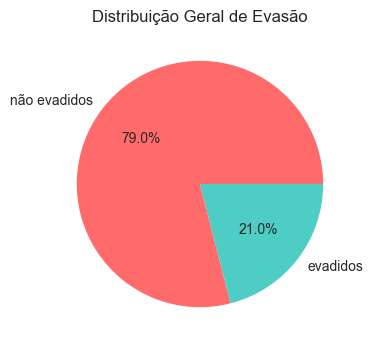

In [16]:
taxa_evasao = (df["evadido"].value_counts(normalize=True)["Sim"] * 100).round(2)
print(f"📉 Taxa de evasão total: {taxa_evasao}%")

# Gráfico
plt.figure(figsize=(4,4))
df["evadido"].value_counts().plot.pie(
    autopct="%1.1f%%",
    colors=["#ff6b6b", "#4ecdc4"],
    labels=["não evadidos", "evadidos"],
    ylabel=""
)
plt.title("Distribuição Geral de Evasão")
plt.show()

---

### 2️⃣ Evasão por Faixa de Renda
- Compara a taxa média de evasão em cada categoria de renda familiar.
- Gera gráfico de barras com proporção de evadidos por faixa de renda.

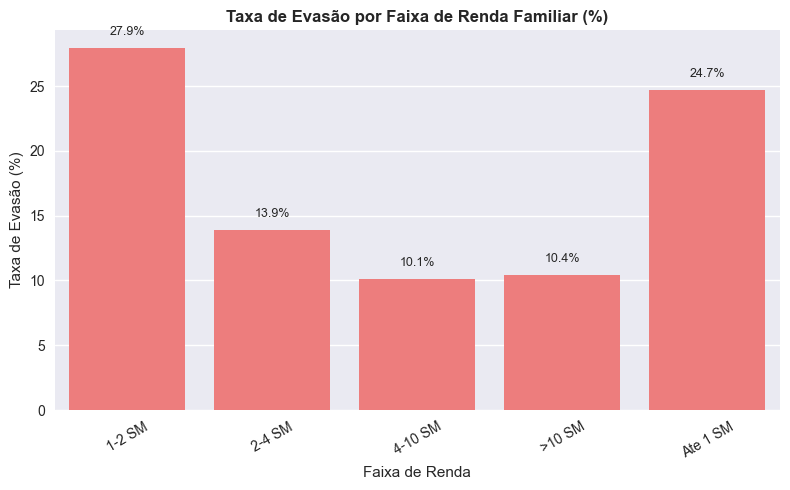

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula taxa de evasão por faixa de renda
evasao_renda = (
    df.groupby("renda_familiar")["evadido"]
    .apply(lambda x: (x == "Sim").mean() * 100)
    .reset_index()
    .rename(columns={"evadido": "taxa_evasao"})
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=evasao_renda,
    x="renda_familiar",
    y="taxa_evasao",
    color="#ff6b6b"
)

plt.title("Taxa de Evasão por Faixa de Renda Familiar (%)", fontsize=12, weight="bold")
plt.xlabel("Faixa de Renda")
plt.ylabel("Taxa de Evasão (%)")

# Exibe o valor percentual em cima das barras
for index, row in evasao_renda.iterrows():
    plt.text(index, row.taxa_evasao + 1, f"{row.taxa_evasao:.1f}%", ha='center', fontsize=9)

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

---

### 3️⃣ Evasão por Turno
- Analisa a taxa de evasão entre turnos (manhã, tarde, noite).
- Mostra gráfico de barras com proporções médias.

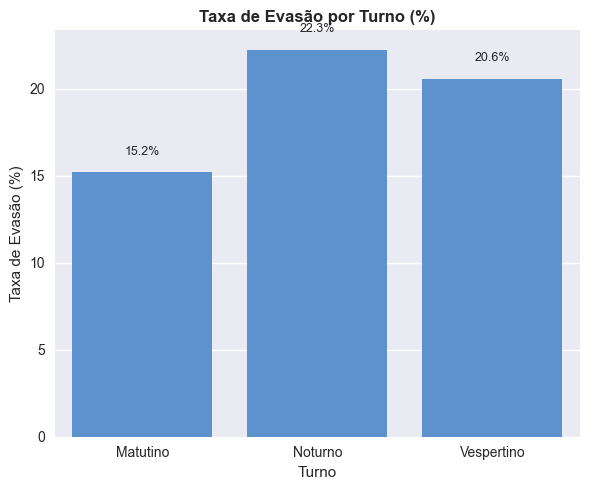

In [5]:
evasao_turno = (
    df.groupby("turno")["evadido"]
    .apply(lambda x: (x == "Sim").mean() * 100)
    .reset_index()
    .rename(columns={"evadido": "taxa_evasao"})
)

plt.figure(figsize=(6,5))
sns.barplot(
    data=evasao_turno,
    x="turno",
    y="taxa_evasao",
    color="#4a90e2"
)

plt.title("Taxa de Evasão por Turno (%)", fontsize=12, weight="bold")
plt.xlabel("Turno")
plt.ylabel("Taxa de Evasão (%)")

for index, row in evasao_turno.iterrows():
    plt.text(index, row.taxa_evasao + 1, f"{row.taxa_evasao:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

---

### 4️⃣ Distância x Evasão
- Compara a distância média entre casa e faculdade para evadidos e não evadidos.
- Exibe boxplot com distribuição das distâncias (em km).

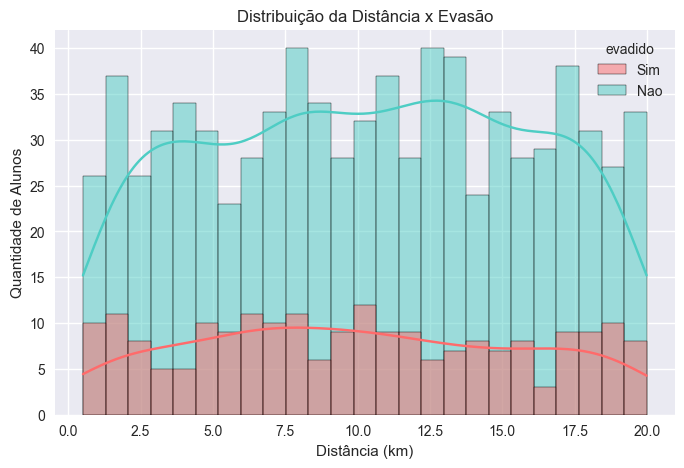

In [2]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="distancia_residencia_faculdade",
    hue="evadido",
    kde=True,
    bins=25,
    palette={"Sim": "#ff6b6b", "Nao": "#4ecdc4"},
    alpha=0.5
)
plt.title("Distribuição da Distância x Evasão")
plt.xlabel("Distância (km)")
plt.ylabel("Quantidade de Alunos")
plt.show()


---

### 5️⃣ Frequência x Desempenho
- Analisa relação entre frequência e coeficiente acadêmico.
- Gera scatterplot colorido por evasão para visualizar tendência entre assiduidade e notas.


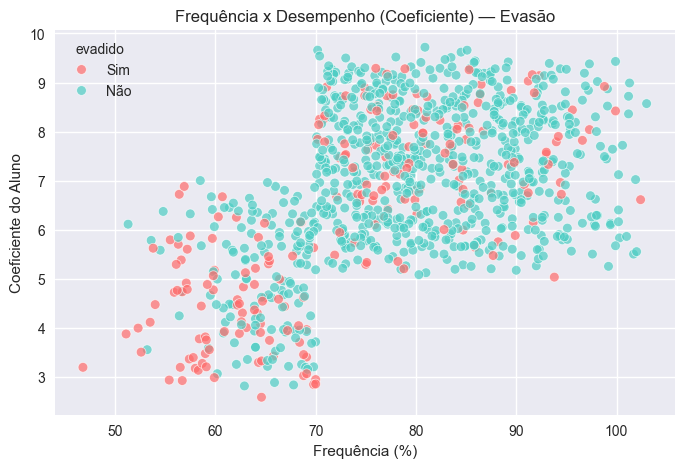

In [15]:
df["evadido"] = (
    df["evadido"]
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({"sim": "Sim", "nao": "Não", "não": "Não"})
)

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="frequencia",
    y="coeficiente_aluno",
    hue="evadido",
    palette={"Sim": "#ff6b6b", "Não": "#4ecdc4"},
    alpha=0.7
)
plt.title("Frequência x Desempenho (Coeficiente) — Evasão")
plt.xlabel("Frequência (%)")
plt.ylabel("Coeficiente do Aluno")
plt.show()

---

### 6️⃣ Modalidades x Evasão
- Analisa relação entre a evasão e as modalidades de ensino (Presencial, EAD e Hibrido)
- Gera um gráfico de barras para visualizar em qual modalidade a evasão é maior.


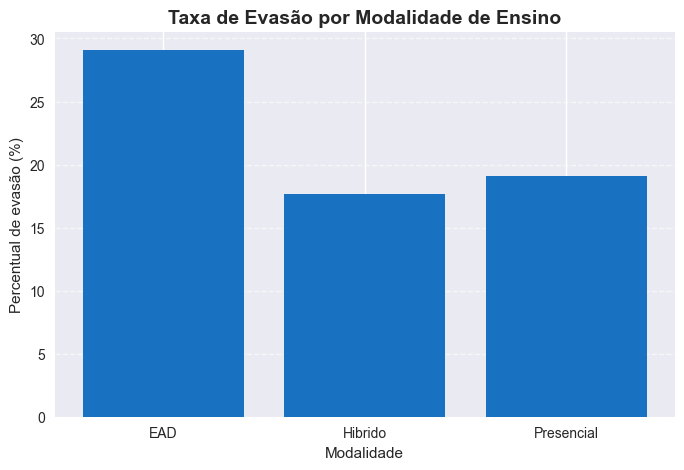

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

evasao_por_modalidade = (
    df.groupby("modalidade")["evadido"]
      .value_counts(normalize=True)
      .rename("percentual")
      .mul(100)
      .reset_index()
)

evasao_por_modalidade = evasao_por_modalidade[evasao_por_modalidade["evadido"] == "Sim"]

plt.figure(figsize=(8,5))
plt.bar(evasao_por_modalidade["modalidade"], evasao_por_modalidade["percentual"], color="#1971c2")
plt.title("Taxa de Evasão por Modalidade de Ensino", fontsize=14, fontweight="bold")
plt.ylabel("Percentual de evasão (%)")
plt.xlabel("Modalidade")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
